# Customer Churn prediction using Logistic Regression

by Patcharapon Chaiporn

**Import Library**

In [1]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/3b/__7994k553n5801pft56525c0000gn/T//Rtmpi8lz2w/downloaded_packages


In [2]:
library(tidyverse)
library(ggplot2)
library(corrplot) #install.packages("corrplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



**Data Preparation**

In [3]:
churn <- read_csv("churn.csv")
glimpse(churn)

Rows: 5000 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): churn, internationalplan, voicemailplan
dbl (15): accountlength, numbervmailmessages, totaldayminutes, totaldaycalls...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 5,000
Columns: 18
$ churn                      <chr> "No", "No", "No", "No", "No", "No", "No", "…
$ accountlength              <dbl> 128, 107, 137, 84, 75, 118, 121, 147, 117, …
$ internationalplan          <chr> "no", "no", "no", "yes", "yes", "yes", "no"…
$ voicemailplan              <chr> "yes", "yes", "no", "no", "no", "no", "yes"…
$ numbervmailmessages        <dbl> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, 0, …
$ totaldayminutes            <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 2…
$ totaldaycalls              <dbl> 110, 123, 114, 71, 113, 98, 88, 79, 97, 84,…
$ totaldaycharge             <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98, 3…
$ totaleveminutes            <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 34…
$ totalevecalls              <dbl> 99, 103, 110, 88, 122, 101, 108, 94, 80, 11…
$ totalevecharge             <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75, 29…
$ totalnightminutes          <dbl> 244.7, 254.4, 162.6, 196.9, 186.9, 203.9, 2…
$ totalnightcall

In [4]:
# Check missing value
colSums(is.na(churn))

churn              accountlength 
                         0                          0 
         internationalplan              voicemailplan 
                         0                          0 
       numbervmailmessages            totaldayminutes 
                         0                          0 
             totaldaycalls             totaldaycharge 
                         0                          0 
           totaleveminutes              totalevecalls 
                         0                          0 
            totalevecharge          totalnightminutes 
                         0                          0 
           totalnightcalls           totalnightcharge 
                         0                          0 
          totalintlminutes             totalintlcalls 
                         0                          0 
           totalintlcharge numbercustomerservicecalls 
                         0                          0

In [5]:
# Change churn, internationalplan and voicemailplan into factor
churn$churn <- ifelse(churn$churn == "No", 0 ,1)
churn$internationalplan <- ifelse(churn$internationalplan == "no", 0 ,1)
churn$voicemailplan <- ifelse(churn$voicemailplan == "no", 0 ,1)

churn$churn <- as.factor(churn$churn)
churn$internationalplan <- as.factor(churn$internationalplan)
churn$voicemailplan <- as.factor(churn$voicemailplan)

**Data Exploration**

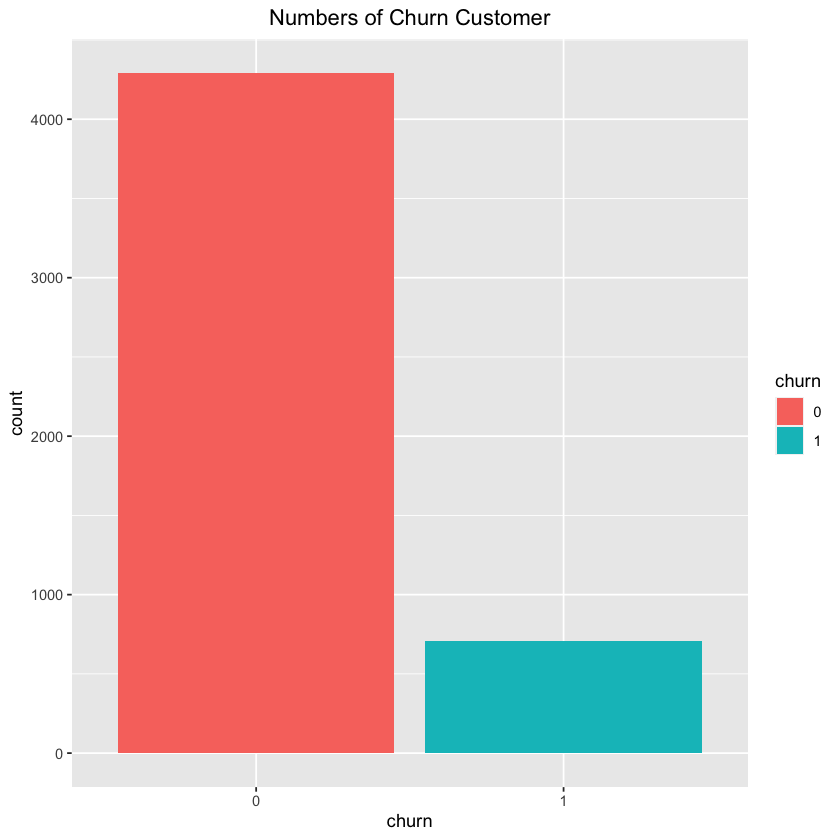

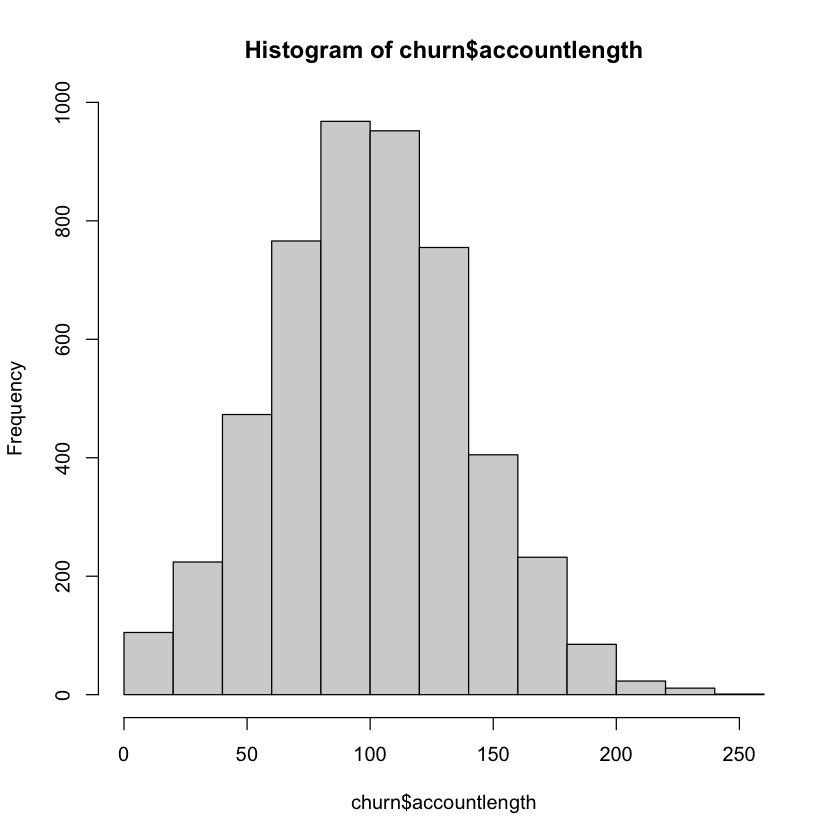

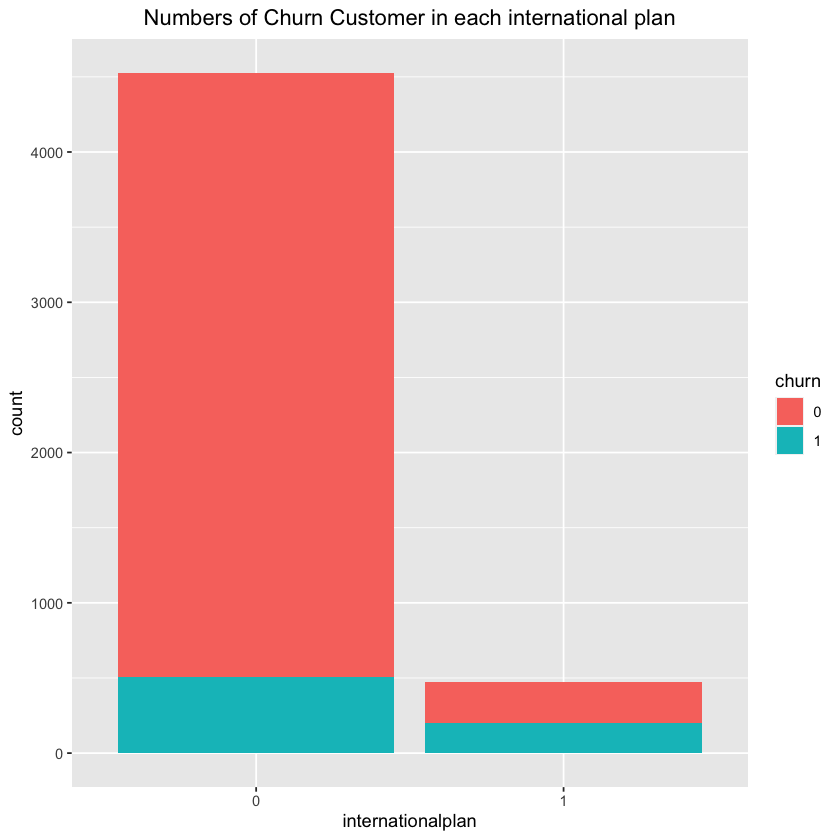

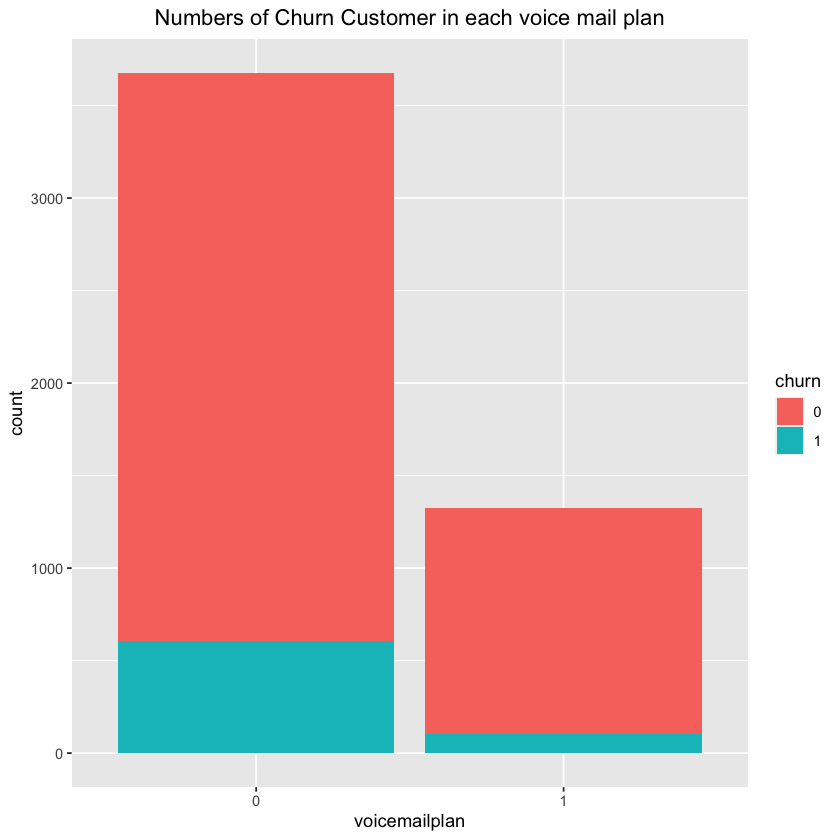

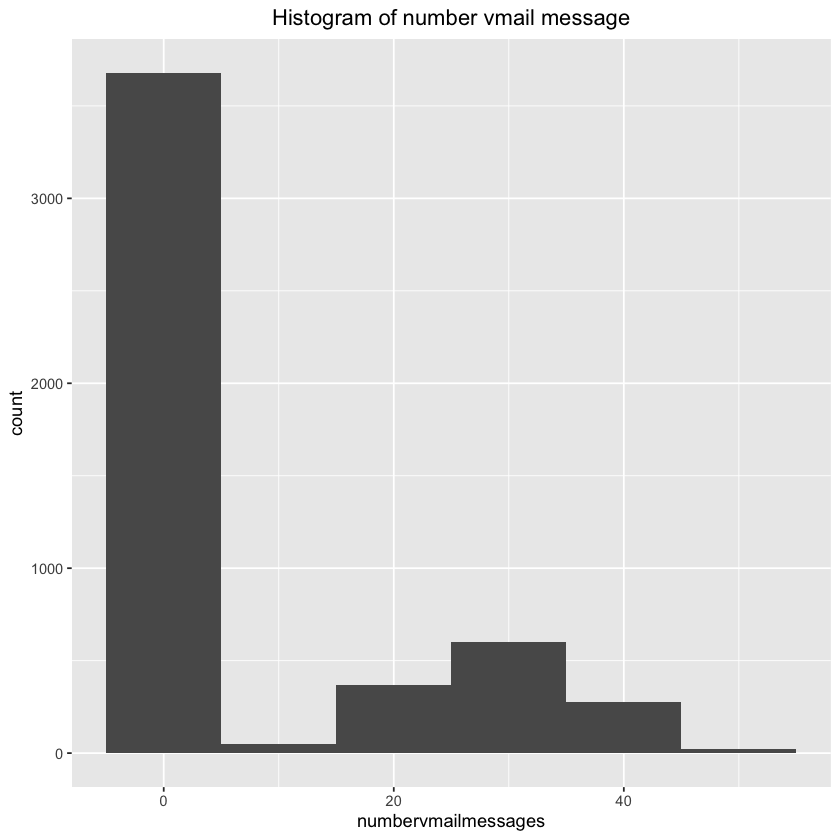

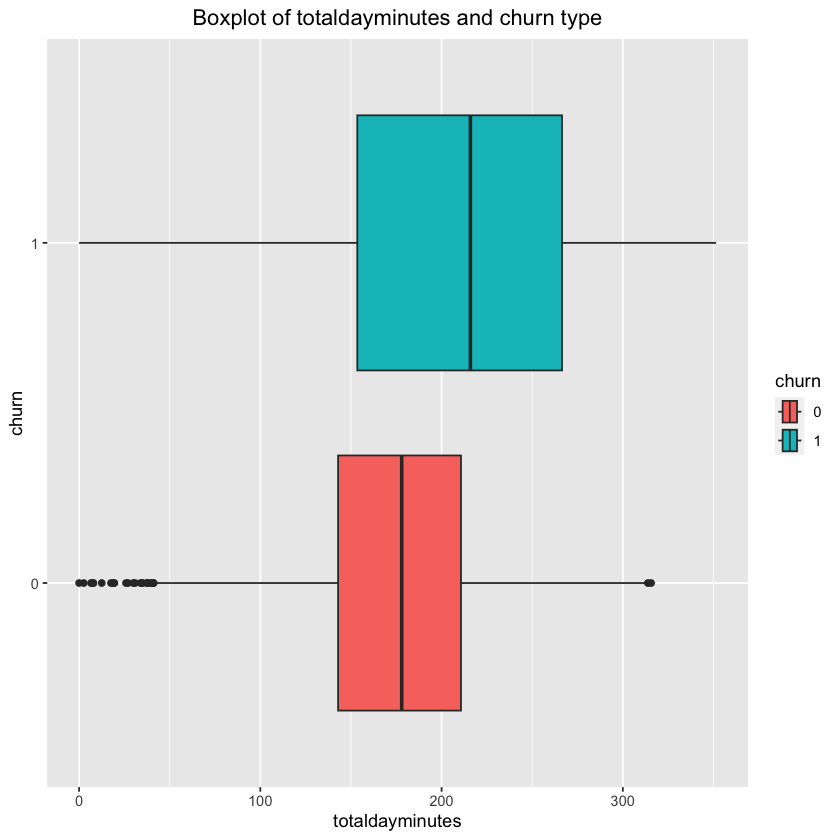

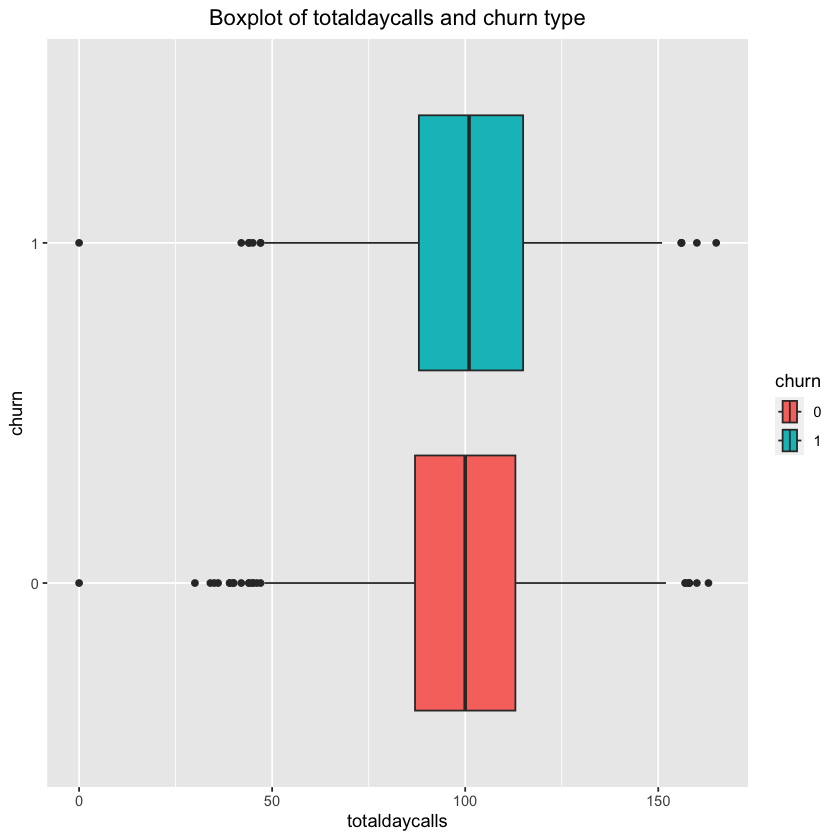

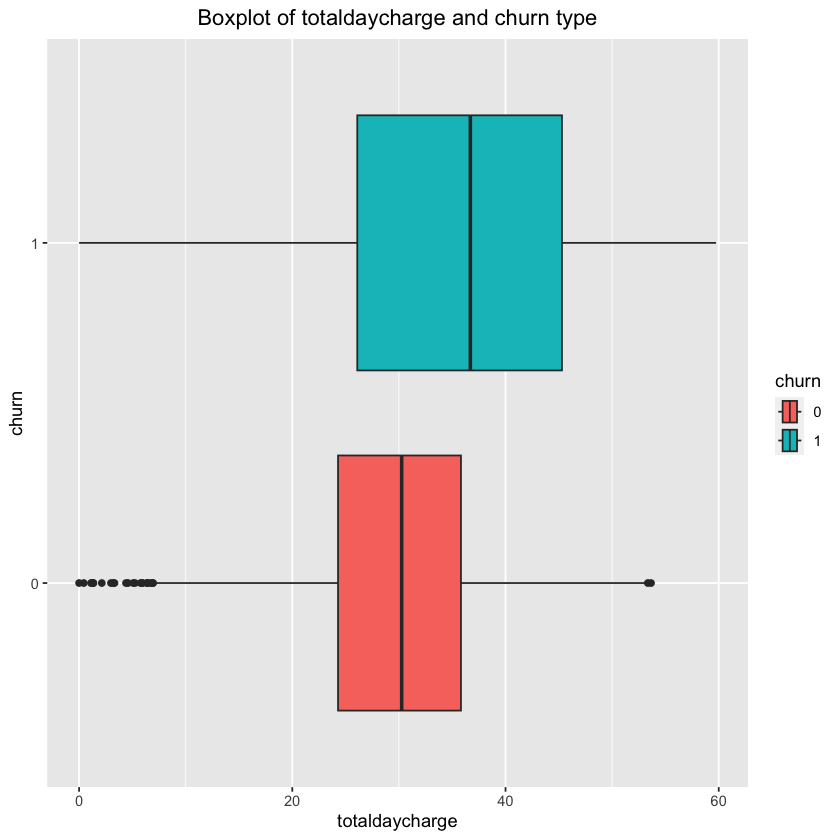

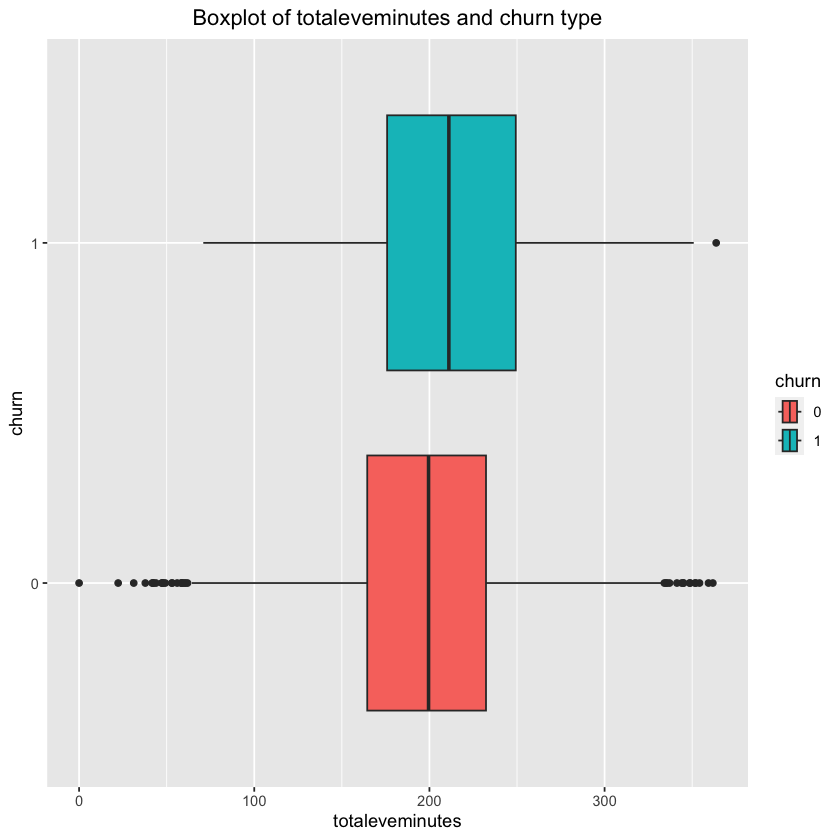

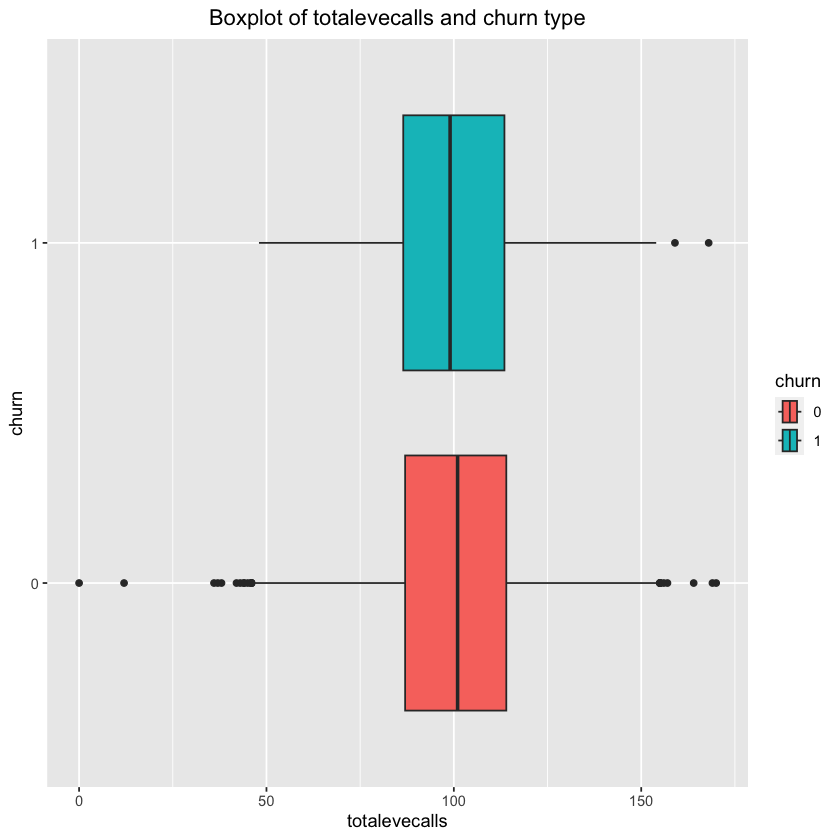

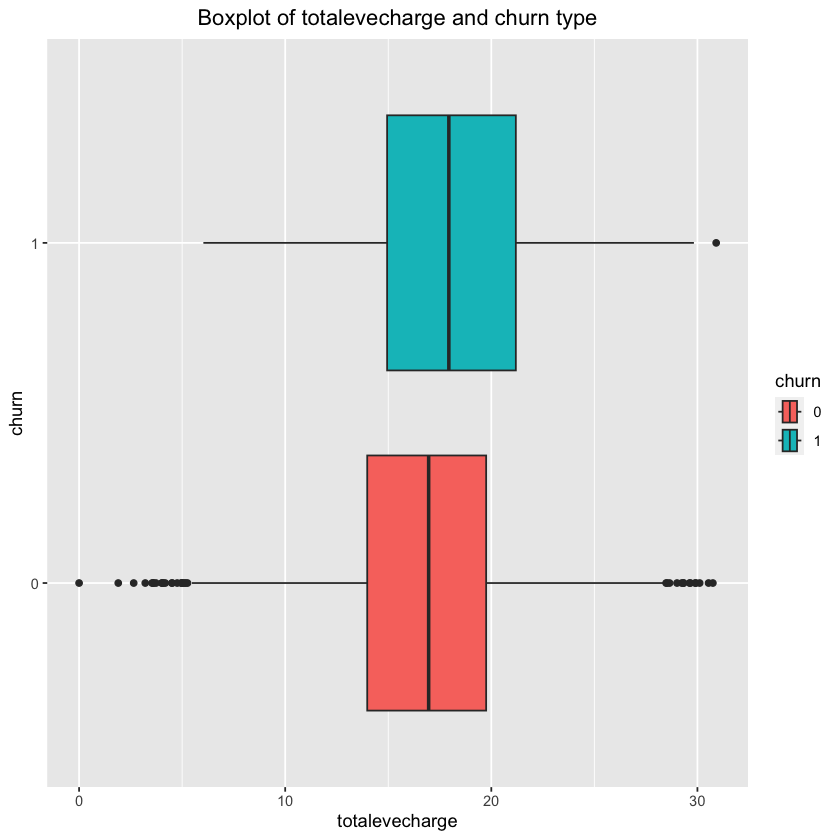

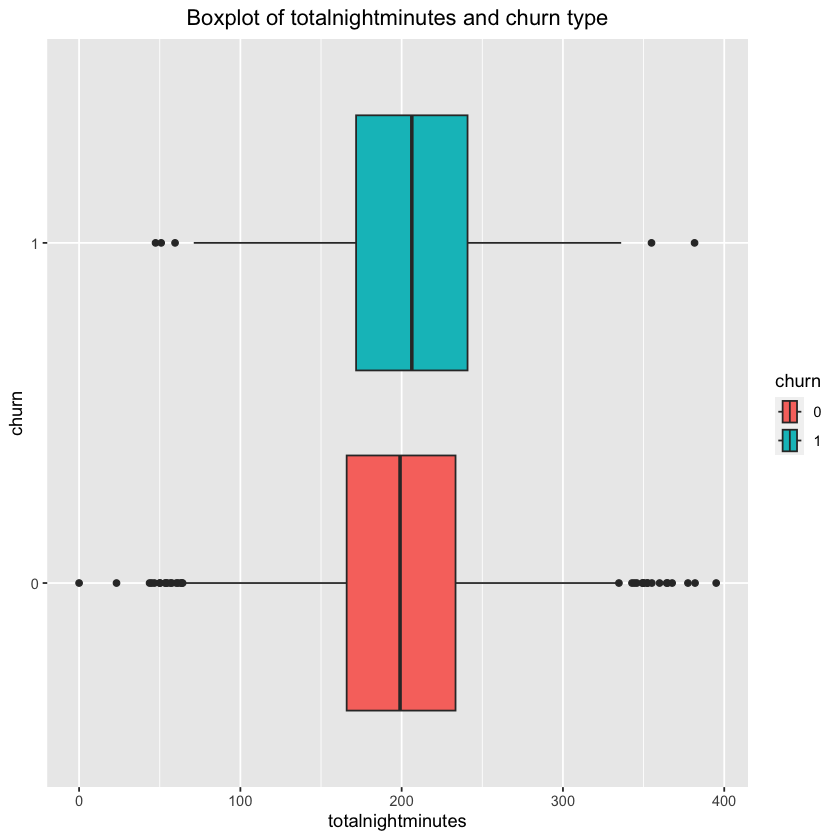

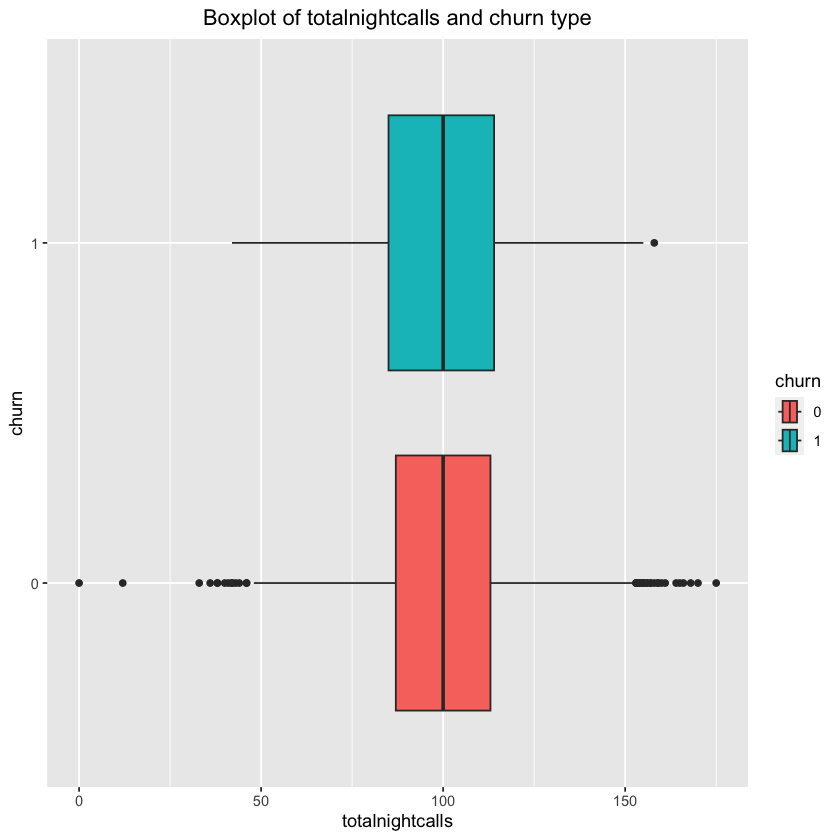

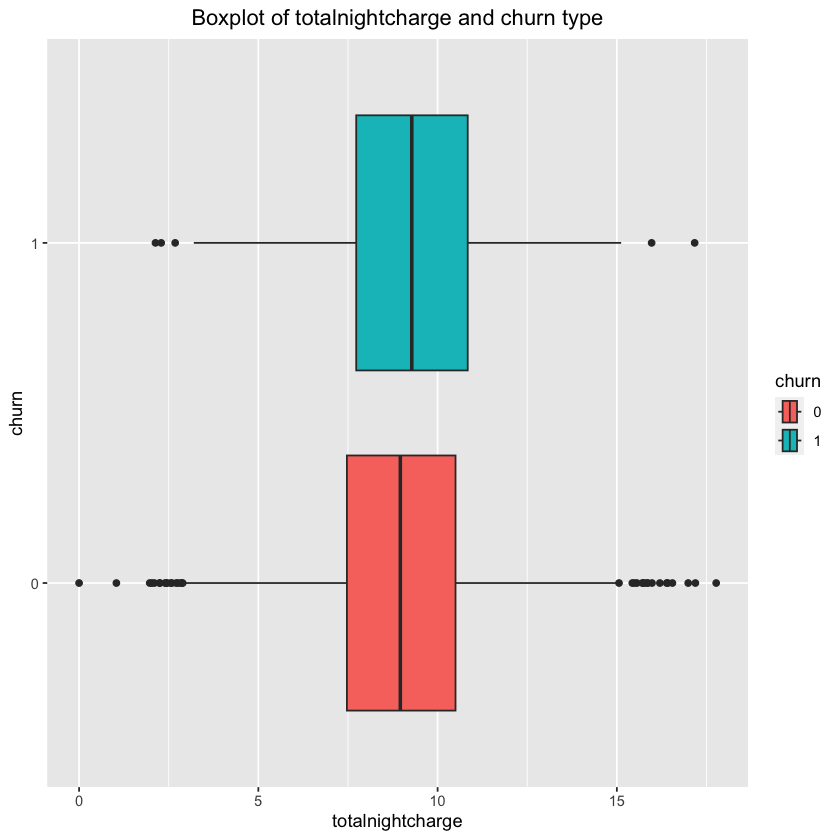

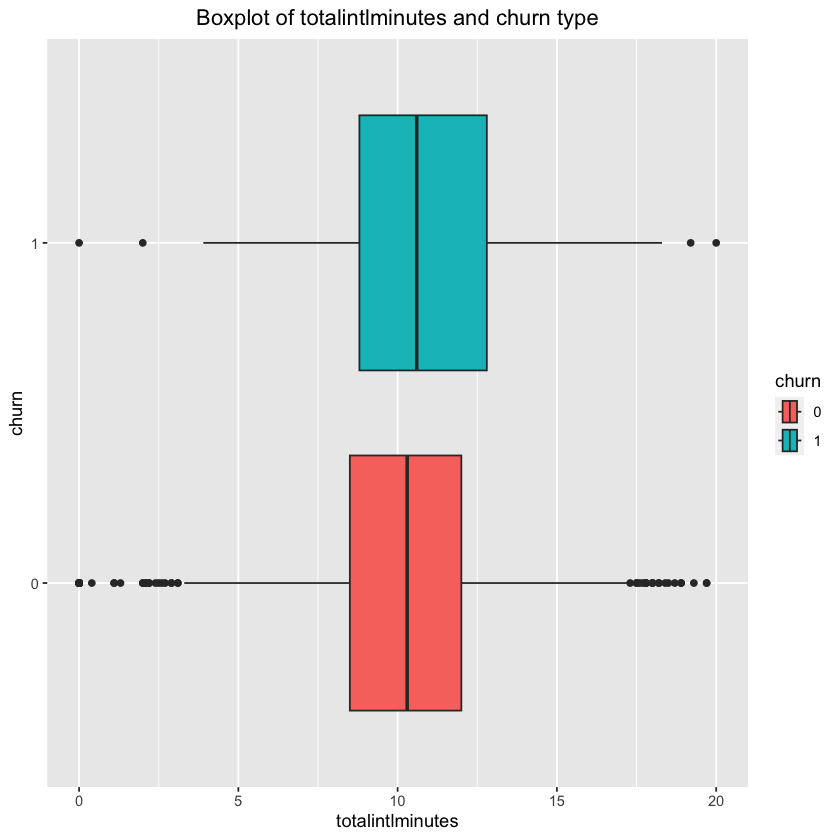

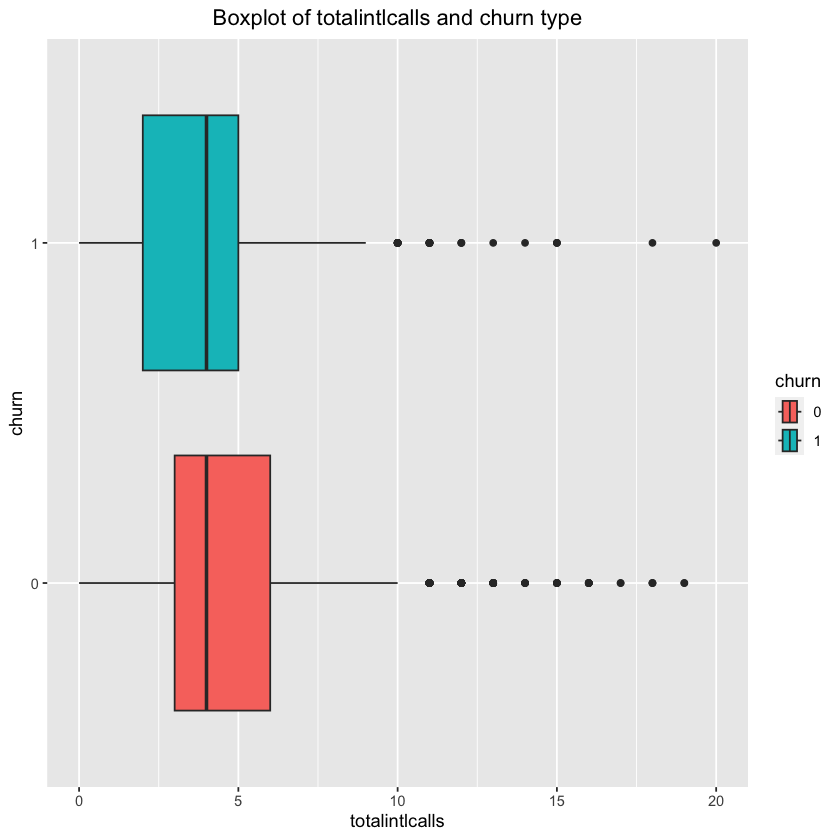

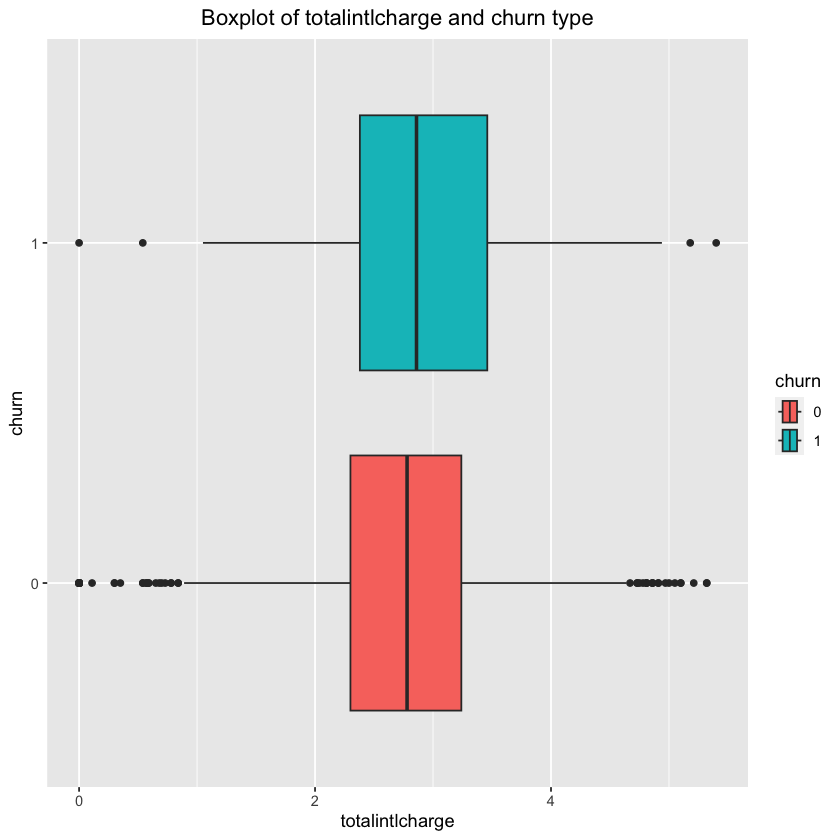

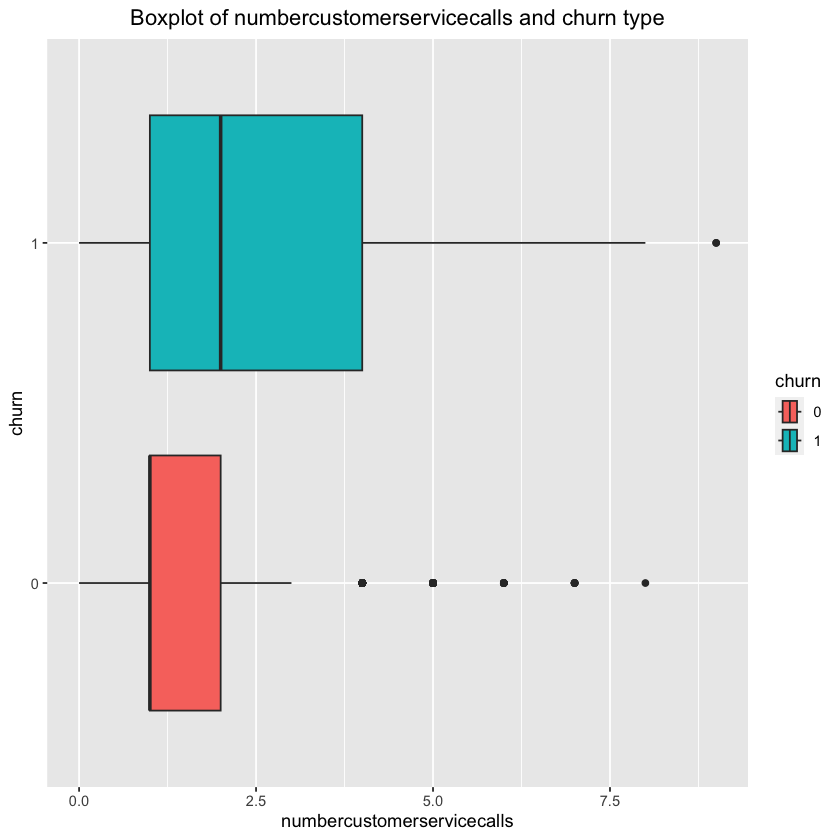

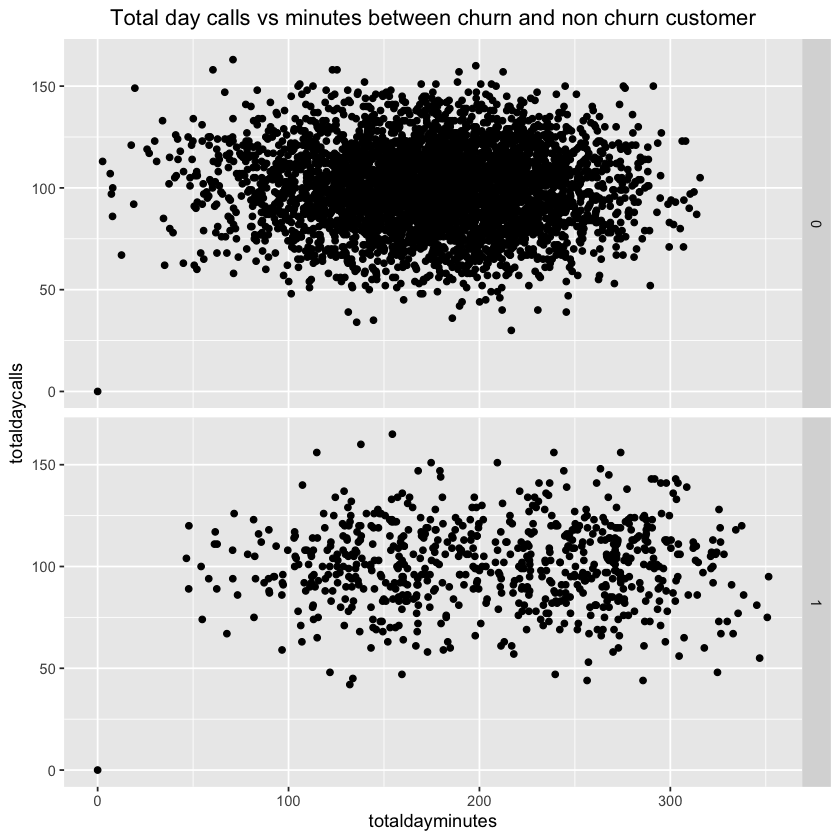

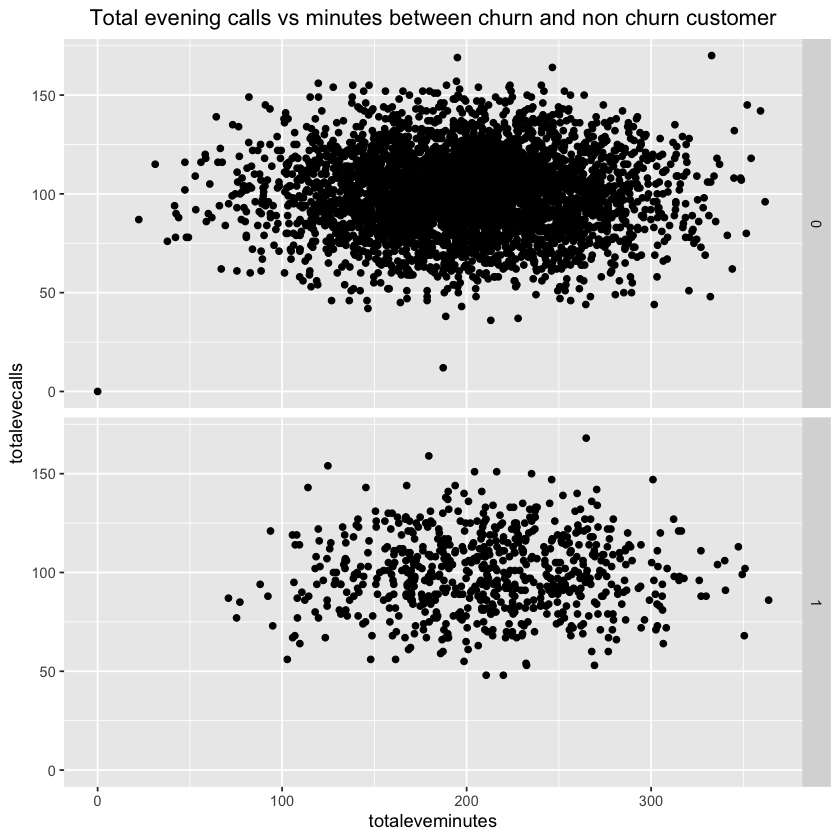

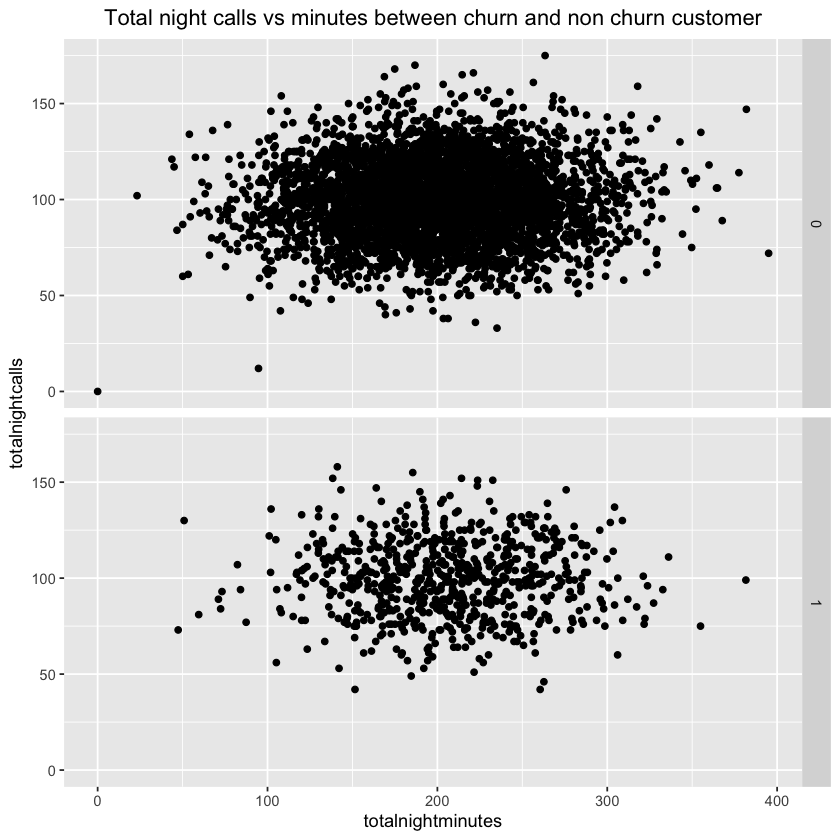

In [6]:
ggplot(churn, aes(churn, fill = churn)) +
  geom_bar() +
  labs(title = "Numbers of Churn Customer")+
  theme(plot.title = element_text(hjust = 0.5))
  hist(churn$accountlength)

ggplot(churn, aes(internationalplan, fill = churn)) +
  geom_bar() +
  labs(title = "Numbers of Churn Customer in each international plan")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(voicemailplan, fill = churn)) +
  geom_bar() +
  labs(title = "Numbers of Churn Customer in each voice mail plan")+
  theme(plot.title = element_text(hjust = 0.5))
  
ggplot(churn, aes(numbervmailmessages)) +
  geom_histogram(binwidth = 10) + 
  labs(title = "Histogram of number vmail message")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaldayminutes,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totaldayminutes and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaldaycalls,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totaldaycalls and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaldaycharge,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totaldaycharge and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaleveminutes,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totaleveminutes and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalevecalls,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalevecalls and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalevecharge,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalevecharge and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalnightminutes,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalnightminutes and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalnightcalls,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalnightcalls and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalnightcharge,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalnightcharge and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalintlminutes,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalintlminutes and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalintlcalls,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalintlcalls and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalintlcharge,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of totalintlcharge and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(numbercustomerservicecalls,churn, fill = churn)) +
  geom_boxplot() +
  labs(title = "Boxplot of numbercustomerservicecalls and churn type")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaldayminutes, totaldaycalls)) +
  geom_point() +
  facet_grid(churn$churn) +
  labs(title = "Total day calls vs minutes between churn and non churn customer")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totaleveminutes, totalevecalls)) +
  geom_point() +
  facet_grid(churn$churn) +
  labs(title = "Total evening calls vs minutes between churn and non churn customer")+
  theme(plot.title = element_text(hjust = 0.5))

ggplot(churn, aes(totalnightminutes, totalnightcalls)) +
  geom_point() +
  facet_grid(churn$churn) +
  labs(title = "Total night calls vs minutes between churn and non churn customer")+
  theme(plot.title = element_text(hjust = 0.5))

**Finding Correlation**

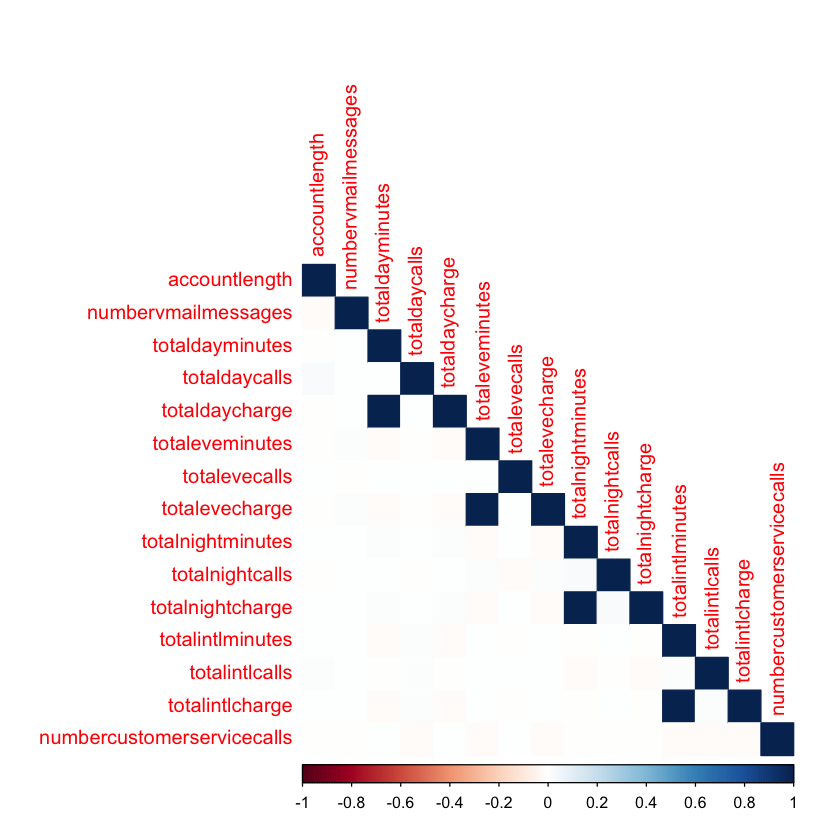

In [7]:
num_cols <- unlist(lapply(churn, is.numeric))
CR <- cor(churn[, num_cols])
corrplot(CR, method = "color",type="lower")

In [8]:
# drop some columns that highly relate to each others
churn <- churn %>% 
  select(-c(voicemailplan,totaldaycharge, totalevecharge, totalnightcharge, totalintlcharge))

**Split data**

In [9]:
set.seed(89)
n <- nrow(churn)
id <- sample(1:n, size = n*0.8)
train_data <- churn[id, ]
test_data <- churn[-id, ]
nrow(train_data)
nrow(test_data)

[1] 4000

[1] 1000

In [10]:
prop.table(table(train_data$churn))


      0       1 
0.86225 0.13775 

**Train model**

In [11]:
trained_model <- glm(churn ~ internationalplan
                      + totaldayminutes + totaleveminutes + totalnightminutes
                      + totalintlminutes + totalintlcalls + numbercustomerservicecalls
                      , data = train_data, family = "binomial")
summary(trained_model)
train_data$prob_churn <- predict(trained_model,type="response")
train_data$pred_churn <- ifelse(train_data$prob_churn>=0.5,1,0)


Call:
glm(formula = churn ~ internationalplan + totaldayminutes + totaleveminutes + 
    totalnightminutes + totalintlminutes + totalintlcalls + numbercustomerservicecalls, 
    family = "binomial", data = train_data)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -8.546039   0.482836 -17.700  < 2e-16 ***
internationalplan1          2.048248   0.134349  15.246  < 2e-16 ***
totaldayminutes             0.014027   0.001027  13.659  < 2e-16 ***
totaleveminutes             0.006393   0.001048   6.097 1.08e-09 ***
totalnightminutes           0.004619   0.001018   4.535 5.75e-06 ***
totalintlminutes            0.081107   0.019255   4.212 2.53e-05 ***
totalintlcalls             -0.072274   0.022708  -3.183  0.00146 ** 
numbercustomerservicecalls  0.495150   0.036557  13.545  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 

**Test Model**

In [12]:
test_data$prob_churn <- predict(trained_model,newdata = test_data, type="response")
test_data$pred_churn <- ifelse(test_data$prob_churn>=0.5,1,0)

**Model Evaluation**

In [13]:
train_conM <- table(train_data$pred_churn, train_data$churn, 
                    dnn =c("Predicted", "Actual"))

test_conM <- table(test_data$pred_churn, test_data$churn, 
                   dnn =c("Predicted", "Actual"))

train_acc <- (train_conM[1,1] + train_conM[2,2])/ sum(train_conM)
test_acc <- (test_conM[1,1] + test_conM[2,2])/ sum(test_conM)

train_prec <- (train_conM[2,2]/(train_conM[2,1] + train_conM[2,2]))
test_prec <- (test_conM[2,2]/(test_conM[2,1] + test_conM[2,2]))

train_rec <- (train_conM[2,2]/(train_conM[1,2] + train_conM[2,2]))
test_rec <- (test_conM[2,2]/(test_conM[1,2] + test_conM[2,2]))

train_f1 <- 2 * (train_prec*train_rec / (train_prec+train_rec))
test_f1 <- 2 * (test_prec*test_rec / (test_prec+test_rec))

cat("Train Accuracy:", train_acc, "| Test Accuracy:", test_acc ,"\n")

cat("Train Precision:",train_prec, "| Test Precision:", test_prec,"\n")

cat("Train Recall:", train_rec, "| Test Recall:", test_rec,"\n")

cat("Train F1:", train_f1, "| Test F1:", test_f1)

Train Accuracy: 0.866 | Test Accuracy: 0.855 
Train Precision: 0.5433526 | Test Precision: 0.6122449 
Train Recall: 0.1705989 | Test Recall: 0.1923077 
Train F1: 0.2596685 | Test F1: 0.2926829